**Market Segmentation of Electronic Vehicles in India**

# **Data Pre-Processing**

In [ ]:
!pip install kmodes

# Kmodes is similar to K means clustering when computing distance for continuous data using mean but for categorical data it uses the mode
# Frequency based dissimilarity measure
# Hence it is more preferrable for clustering multiple datatypes

In [ ]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from kmodes.kprototypes import KPrototypes

In [ ]:
df2 = pd.read_csv('EV_Customer_Segmentation_dataset.csv')

# **Data Exploration**

In [ ]:
df2.head(10)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
5,28,Salaried,Married,Graduate,3,Yes,900000,700000
6,31,Salaried,Married,Graduate,4,No,1800000,1200000
7,33,Business,Married,Post Graduate,4,No,1400000,700000
8,34,Business,Married,Post Graduate,4,No,2000000,1100000
9,34,Salaried,Married,Graduate,3,Yes,1900000,800000


In [ ]:
df2.tail()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
94,27,Business,Single,Graduate,0,No,2400000,1600000
95,50,Salaried,Married,Post Graduate,3,No,5100000,1600000
96,51,Business,Married,Graduate,2,Yes,2200000,1100000
97,51,Salaried,Married,Post Graduate,2,No,4000000,1500000
98,51,Salaried,Married,Post Graduate,2,Yes,2200000,1100000


In [ ]:
df2.shape

(99, 8)

In [ ]:
#No Null values found
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [ ]:
df2.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [ ]:
#cheking for duplicate rows in the dataset
df2.duplicated().sum()

0

In [ ]:
#checking whether there is any null value or not
df2.isnull().sum()

,0
Age,0
Profession,0
Marrital Status,0
Education,0
No of Dependents,0
Personal loan,0
Total Salary,0
Price,0


In [ ]:
df2.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price'],
      dtype='object')

In [ ]:
df2.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df2.rename(columns={'Price':'EV_Price'},inplace=True)
df2.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,Total Salary,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


# **Data Visualization**

# **Age Distribution Analysis**

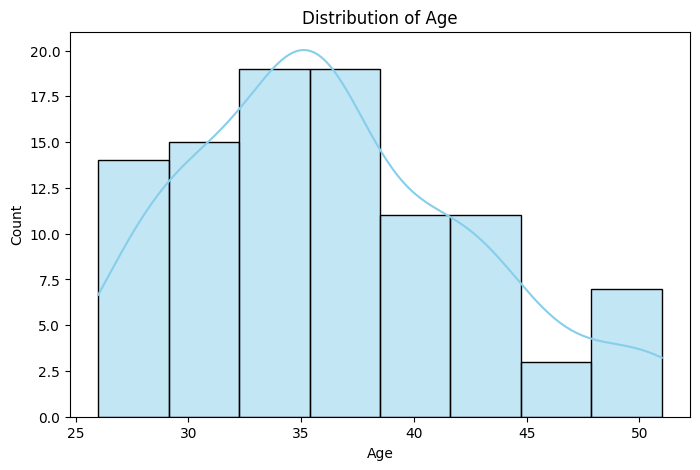

In [ ]:
#Distribution by Age
plt.figure(figsize=(8, 5))
sns.histplot(df2['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# **Customer Count by Profession**

<ipython-input-14-f7c88ff655e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='Profession', palette='Set2')


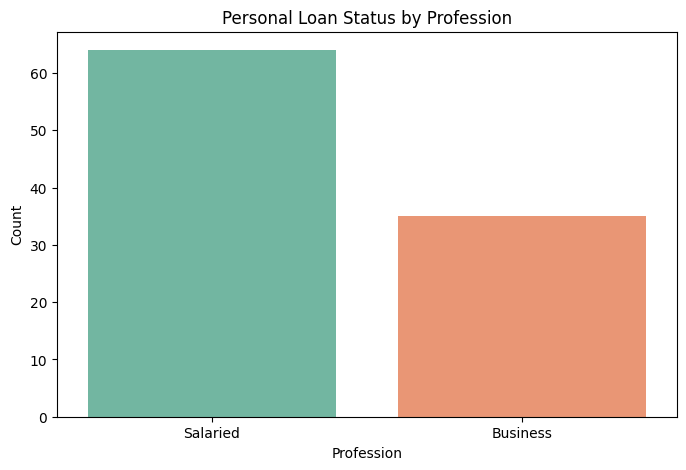

In [ ]:
#Count of Customers by Profession
plt.figure(figsize=(8, 5))
sns.countplot(data=df2, x='Profession', palette='Set2')
plt.title('Personal Loan Status by Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.show()


# **Car Loan Status by Marital Status**

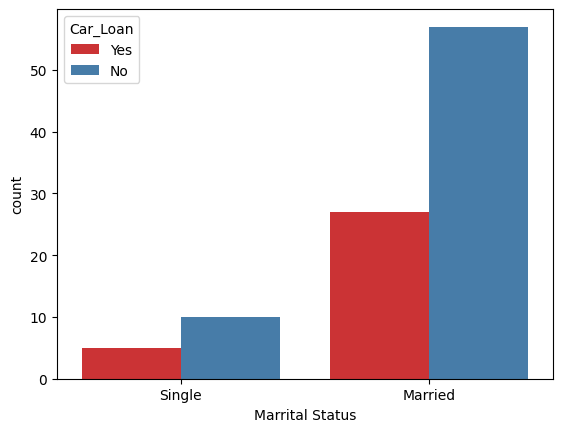

In [ ]:
# Plotting the Car loan status with respect to Marrital Status
sns.countplot(x ='Marrital Status', hue = 'Car_Loan',  data = df2, palette = 'Set1')
plt.show()

In [ ]:
(df2['Marrital Status'].value_counts()['Married'])/((df2['Marrital Status'].value_counts()['Married'])+(df2['Marrital Status'].value_counts()['Single']))*100


84.84848484848484

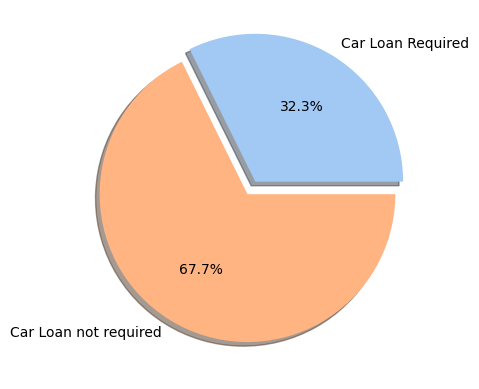

In [ ]:
#Getting labels and data
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [df2.query('Car_Loan == "Yes"').Car_Loan.count(),df2.query('Car_Loan == "No"').Car_Loan.count()]

# declaring exploding pie
explode = [0.1, 0]
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# plotting data on chart
plt.pie(Loan_status, labels=labels, colors=palette_color, shadow = "True",
        explode=explode, autopct='%1.1f%%')

# displaying chart
plt.show()


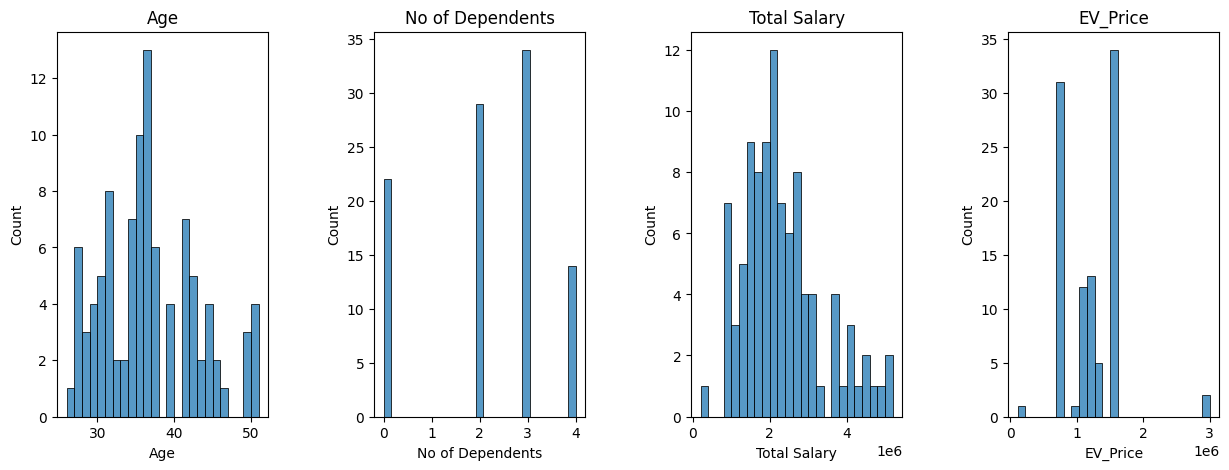

In [ ]:
# Plotting the fequency of each entry for consumer features - Age, No. 0f Dependents, Total Salary, EV_Price
plt.figure(1, figsize=(15,5))
n=0

for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df2[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [ ]:
cluster_features = list(df2.columns)
cluster_data = df2[cluster_features].values

In [ ]:
cluster_data[:, 0]

array([27, 35, 45, 41, 31, 28, 31, 33, 34, 34, 35, 35, 29, 30, 31, 49, 26,
       27, 29, 30, 37, 35, 36, 35, 35, 35, 35, 36, 36, 36, 41, 41, 41, 43,
       42, 42, 29, 30, 30, 31, 31, 32, 32, 34, 34, 34, 36, 36, 36, 36, 49,
       49, 44, 44, 41, 41, 41, 27, 27, 28, 28, 30, 31, 31, 31, 39, 39, 39,
       39, 37, 37, 37, 37, 35, 36, 36, 36, 36, 44, 45, 46, 44, 43, 42, 42,
       42, 29, 33, 34, 34, 35, 36, 37, 27, 27, 50, 51, 51, 51],
      dtype=object)

In [ ]:
cluster_data[:, 0] = cluster_data[:, 0].astype(float)
cluster_data[:, 4] = cluster_data[:, 4].astype(float)
cluster_data[:, 6] = cluster_data[:, 6].astype(float)
cluster_data[:, 7] = cluster_data[:, 7].astype(float)

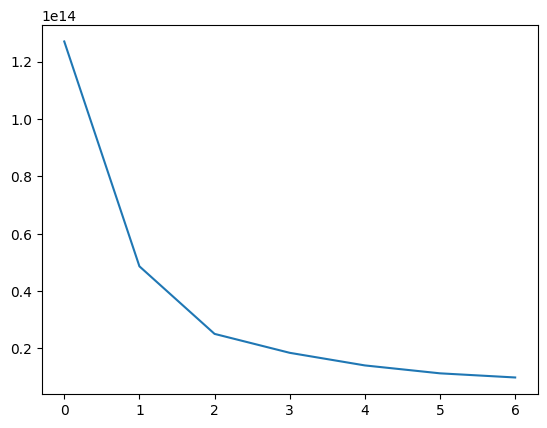

In [ ]:
# Finding optimal number of clusters for KPrototypes

cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [ ]:
cost

[126979657487180.34,
 48631729380526.18,
 25087753148183.234,
 18491809410726.285,
 14099253855131.873,
 11342834153820.58,
 9899011952147.764]

In [ ]:
# fitting data to clusters

kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 14, ncost: 50256375135018.81
Run: 1, iteration: 2/20, moves: 2, ncost: 50057040964014.66
Run: 1, iteration: 3/20, moves: 1, ncost: 50020391397205.32
Run: 1, iteration: 4/20, moves: 0, ncost: 50020391397205.32
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 33, ncost: 50344894634768.04
Run: 2, iteration: 2/20, moves: 9, ncost: 48631729380526.18
Run: 2, iteration: 3/20, moves: 0, ncost: 48631729380526.18
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 18, ncost: 51421678794362.086
Run: 3, iteration: 2/20, moves: 6, ncost: 50057040964014.66
Run: 3, iteration: 3/20, moves: 1, ncost: 50020391397205.32
Run: 3, iteration: 4/20, moves: 0, ncost: 50020391397205.32
Init: initializing c

In [ ]:
# Appending the cluster data

df2['Cluster'] = clusters

In [ ]:
# Average cost of a car in segment 1
df2.EV_Price[df2.Cluster==0].mean()

1021267.6056338028

In [ ]:
df2['EV_Price'][df2.Cluster==1].max()

3000000

In [ ]:
# Average cost of a car in segment 1
df2.EV_Price[df2.Cluster==1].mean()

1632142.857142857

In [ ]:
df2['Cluster'].value_counts(normalize=True) * 100

,proportion
Cluster,
0,71.717172
1,28.282828


In [ ]:
# Segregrating each cluster

Cluster_0 = df2[df2.Cluster==0]
Cluster_1 = df2[df2.Cluster==1]

In [ ]:
df2['Cluster'].value_counts()

,count
Cluster,
0,71
1,28


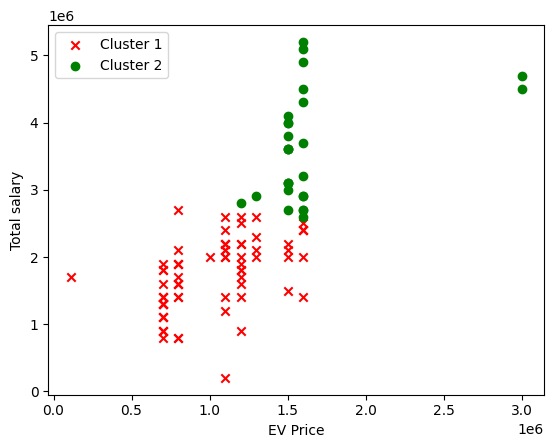

In [ ]:
# plotting the effct of salary and ev price on cluster data

plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased

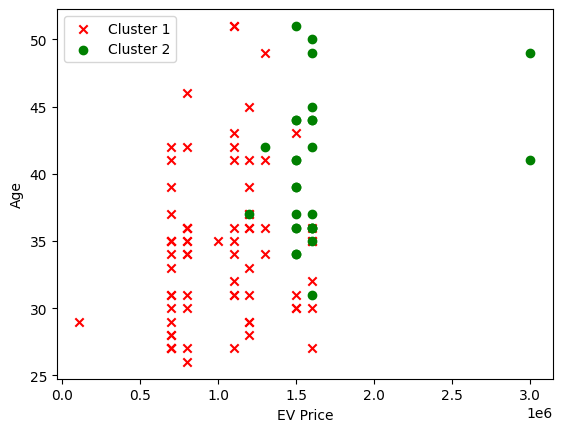

In [ ]:

plt.scatter(Cluster_0.EV_Price, Cluster_0['Age'],color='red', marker = 'x', label = 'Cluster 1')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc = "upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

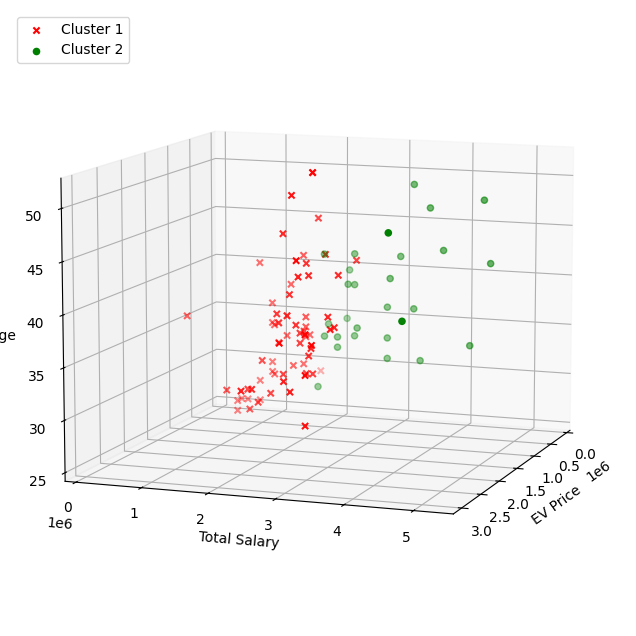

In [ ]:
# plotting influence of age

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['Age'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['Age'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')

ax.view_init(10, 20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('Age')
plt.show()

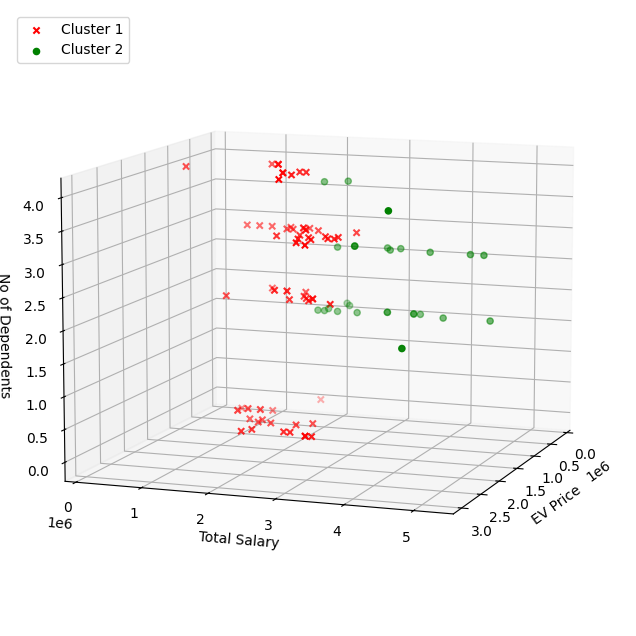

In [ ]:
# plotting influence of No of Dependents

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'], Cluster_0['No of Dependents'], color='red', marker = 'x', label = 'Cluster 1')
ax.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],Cluster_1['No of Dependents'], color='green', label = 'Cluster 2')
plt.legend(loc = 'upper left')
ax.view_init(10,20)

plt.xlabel("EV Price")
plt.ylabel("Total Salary")
ax.set_zlabel('No of Dependents')
plt.show()


In [ ]:
df2['No of Dependents'].value_counts()

,count
No of Dependents,
3,34
2,29
0,22
4,14


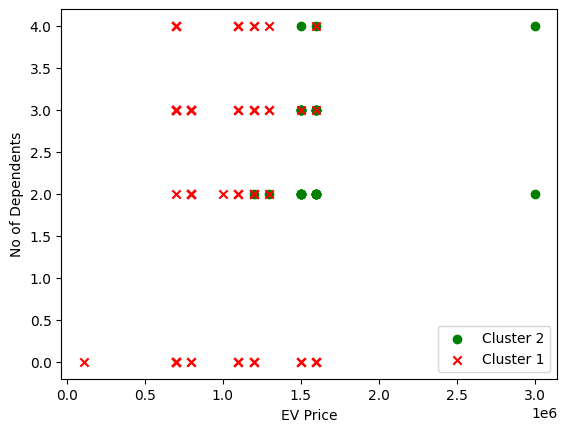

In [ ]:
# plotting the effct of no of dependents and ev price on cluster data


plt.scatter(Cluster_1.EV_Price, Cluster_1['No of Dependents'],color='green', label = 'Cluster 2')
plt.scatter(Cluster_0.EV_Price, Cluster_0['No of Dependents'],color='red', marker = 'x', label = 'Cluster 1')
plt.legend(loc="lower right")

plt.xlabel('EV Price')
plt.ylabel('No of Dependents')
plt.show()

# there is a clear difference in segments when comparing salary and the price of EV purchased

**Cluster 0 → Early Adopters: This group is likely to include younger, well-educated, and environmentally conscious customers who are willing to pay a premium for new technology.**

**Cluster 1 → Early Majority: This group may consist of middle-income, middle-aged consumers who are interested in EVs but are more price-sensitive and need evidence of the product’s benefits.**

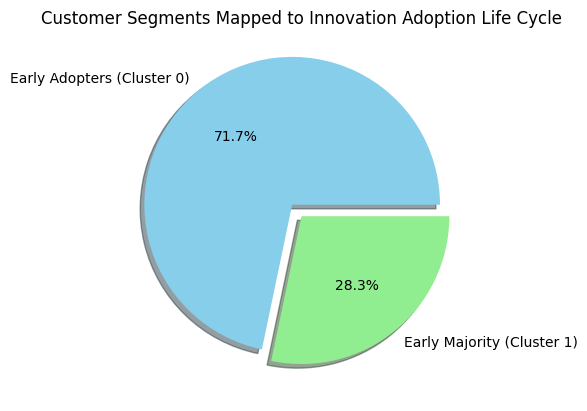

In [ ]:
# **Mapping Clusters to Technology Adoption Life Cycle (TALC)**
df2['TALC'] = df2['Cluster'].map({0: 'Early Adopters', 1: 'Early Majority'})

# **Pie Chart for Life Cycle Distribution**
labels = ['Early Adopters (Cluster 0)', 'Early Majority (Cluster 1)']
sizes = [df2[df2['Cluster'] == 0].shape[0], df2[df2['Cluster'] == 1].shape[0]]
colors = ['skyblue', 'lightgreen']
explode = (0.1, 0)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Customer Segments Mapped to Innovation Adoption Life Cycle')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Convert categorical data to numerical for evaluation purposes
for col in [1, 2, 3, 5]:  # Categorical indices used in clustering
    cluster_data[:, col] = pd.factorize(cluster_data[:, col])[0]

# Compute Silhouette Score (Higher is better)
silhouette_avg = silhouette_score(cluster_data, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.55


In this analysis, we used the K-Prototypes clustering algorithm to segment customers based on their characteristics such as EV Price, Total Salary, Age, and Number of Dependents. The dataset was divided into two distinct clusters: Early Adopters (Cluster 0), characterized by younger, tech-savvy individuals willing to pay a premium for new EV technology, and Early Majority (Cluster 1), made up of middle-aged, middle-income customers who are more price-sensitive and adopt technology after it gains mainstream acceptance. We mapped these segments to the Technology Adoption Life Cycle (TALC), where Early Adopters correspond to the innovators and Early Majority represents a more cautious group. The Silhouette Score of 0.55 suggests that the clustering is reasonably good, with some separation between the groups, though further optimization is possible. Visualizations, including scatter and 3D plots, highlighted key differences in customer attributes, helping to understand the factors that define each segment. Based on these insights, targeted marketing strategies can be developed for both groups, focusing on premium offerings for Early Adopters and value-based messaging for the Early Majority